In [ ]:
Divisione 70-30 del Dataset

70% :  Training Set
30% :  Testing Set

In [8]:
import pandas as pd 
from sklearn.model_selection import train_test_split

#carica il dataset
df = pd.read_csv('dataset/mainDataset2.csv')


#suddivide il dataset in training e testing
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Converte la colonna "Gender" in numerica: "Male" = 0, "Female" = 1
#train_df['Gender'] = train_df['Gender'].map({'Male': 0, 'Female': 1})


#salva i dataset
train_df.to_csv('dataset/trainDataset.csv', index=False)
test_df.to_csv('dataset/testDataset.csv', index=False)  

Verifica bilanciamento del dataset per il training dopo la divisione

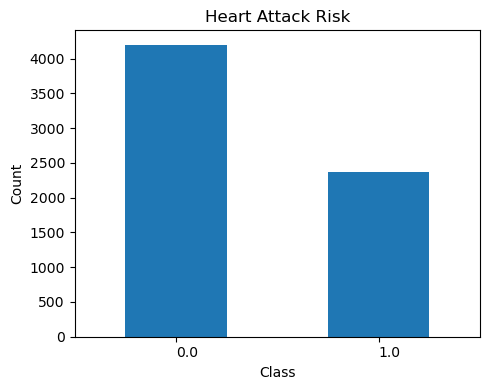

In [9]:
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/trainDataset.csv')

plt.figure(figsize=(5, 4))
diet_counts = df['Heart Attack Risk'].value_counts().sort_index()
diet_counts.plot(kind='bar')
plt.title('Heart Attack Risk')
plt.ylabel('Count')
plt.xlabel('Class')
plt.xticks(rotation=0, ha='left')
plt.tight_layout()
plt.show()

SMOTE e undersampling sul trainDataset per bilanciarlo

In [10]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler  

df = pd.read_csv('dataset/trainDataset.csv')

#separa le feature dalla variabile target
X_train = df.drop(columns=['Heart Attack Risk'], axis=1)
y_train = df['Heart Attack Risk']

#applica Smote

smote  = SMOTE(random_state=42)
X_smote, y_smore = smote.fit_resample(X_train, y_train)
smote_df = pd.concat([X_smote, y_smore], axis=1)
smote_df.to_csv('dataset/smoteDataset.csv', index=False)


#applica undersampling
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)
undersampler_df = pd.concat([X_under, y_under], axis=1)
undersampler_df.to_csv('dataset/undersamplerDataset.csv', index=False)


print("Dataset con SMOTE e undersampling creati ")


Dataset con SMOTE e undersampling creati 


VERIFICA BILANCIAMENTO


smoteDataset = trainDataset con SMOTE
undersamplerDataset = trainDataset con undersampling

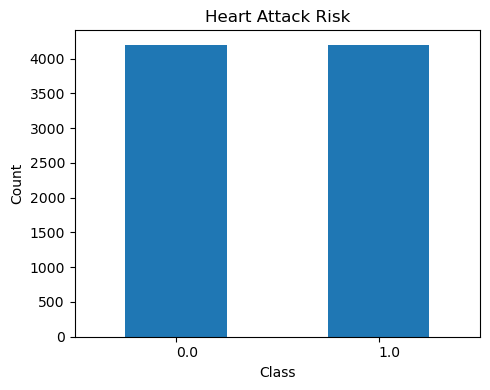

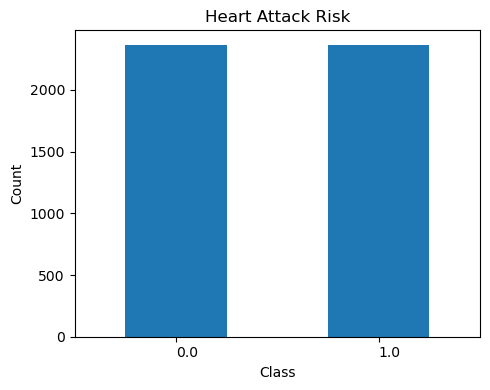

In [13]:
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/smoteDataset.csv')

plt.figure(figsize=(5, 4))
diet_counts = df['Heart Attack Risk'].value_counts().sort_index()
diet_counts.plot(kind='bar')
plt.title('Heart Attack Risk')
plt.ylabel('Count')
plt.xlabel('Class')
plt.xticks(rotation=0, ha='left')
plt.tight_layout()
plt.show()


df = pd.read_csv('dataset/undersamplerDataset.csv')


plt.figure(figsize=(5, 4))
diet_counts = df['Heart Attack Risk'].value_counts().sort_index()
diet_counts.plot(kind='bar')
plt.title('Heart Attack Risk')
plt.ylabel('Count')
plt.xlabel('Class')
plt.xticks(rotation=0, ha='left')
plt.tight_layout()
plt.show()
